# Beginnger Computer Vision with Detectron2 , run and see the results for yourself!

Original Detectron2 git: https://github.com/facebookresearch/detectron2

some code in this document is adpated from the originanl Detectron2 tutorial by Facebook

Please set **Runtime to GPU** to start 

Follow the instructions on each cell block to run Detectron2 models on your own images. 

Detectron2 is an extremely powerful tool in computer vision, it has dozens of advanced models that allow different image processing requirements and can be used to establish custom datasets to train your own models.


Feel free to email me if you have any questions : tracyqian0720@gmail.com

Really glad that you are here! Enjoy! 
-Tracy

# **Install Detectron2 and Dependencies**

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
#!pip install opencv-python
#opencv is preinstalled on colab
import numpy as np
import os, json, random, cv2
from google.colab.patches import cv2_imshow
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
import torch
import torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

#this takes about 3-5 mins
#note: you will need to run this cell twice for the first time installation

Looking in links: https://download.pytorch.org/whl/torch_stable.html
1.8.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
#install detectron2
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

#this takes about 1-2 mins
#note: you will need to run this cell twice for the first time installation

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


# **Mount To Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Run Model**

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from google.colab.patches import cv2_imshow

Process image discard 4th channel

In [ ]:
import os
import numpy as np
path = "/content/gdrive/MyDrive/my data"
#change path to where files are located

for filename in os.listdir(path):
  img = cv2.imread(path +'/'+filename,-1)
  if img is None:
    #os.remove(os.path.join(path, filename))
    print(path +'/'+filename)
  else:
    if img.shape[2] == 4:
      alpha = img[:, :, -1]
      alpha = np.stack([alpha] * 3, axis=-1) / 255
      #print(np.unique(alpha))
      img = np.uint8(img[:, :, :3] * alpha + 255*(1-alpha))
      cv2.imwrite(path+ filename,img)

Run and see results for your self! 
Default model I am using here is Instance Segmentation, feel free to go on https://github.com/facebookresearch/detectron2/blob/main/detectron2/model_zoo/model_zoo.py 
model zoo to find other models and play around your self!


The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


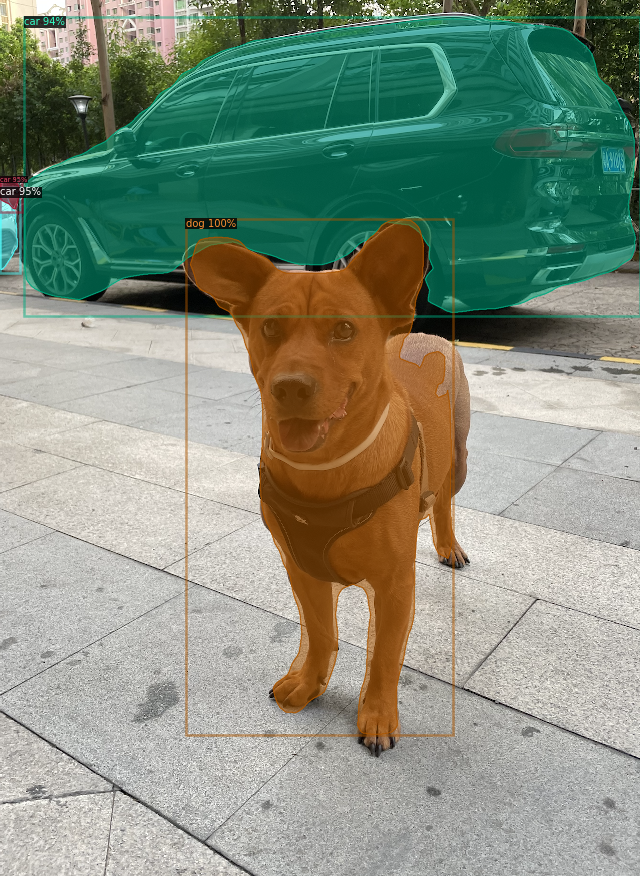

In [ ]:
from os import listdir
from os.path import isfile, join

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.92  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
n = 0

for i in onlyfiles:
  if '.jpg' in i or '.png' in i:
    im = cv2.imread(path+i)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])
    #cv2.imwrite("/content/gdrive/MyDrive/my data"+ str(n) + ".png",out.get_image()[:, :, ::-1])
    #n += 1
    #uncomment this part if you want to save the images to drive